## Import Statements

### I linked the google sheet to this notebook using this source: https://towardsdatascience.com/from-google-sheet-to-your-jupyter-notebook-ccdbf28fbf1b. Any updates to the google sheet will be reflected automatically in this notebook

In [3]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import datetime

In [4]:
#Importing the module
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

## Link to Google Sheets

Connect the Google Sheets API

In [5]:
#The scope is always look like this so we did not need to change anything
scope = [
   'https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

#Name of our Service Account Key
google_key_file = 'jupyter-spring2020ctc-connect-3bde2ba97cd1.json'

credentials = ServiceAccountCredentials.from_json_keyfile_name(google_key_file, scope)
gc = gspread.authorize(credentials)

Open and save the "Spring 2020 CTC Recording" Google Sheets document, specifically the "Cans-Recording" sheet

In [6]:
#Opening the worksheet by using Worksheet ID
spreadsheet_key = '1OiGBYsa9eK26lAaznmiiczgSX17GHlOWoS0crNza-vo'
workbook = gc.open_by_key(spreadsheet_key)

#Selecting which sheet to pulling the data
sheet = workbook.worksheet('Cans-Recording')

#Pulling the data and transform it to the data frame
values = sheet.get_all_values()
df = pd.DataFrame(values[1:], columns = values[0])

## Data Cleaning

Open the dataframe

In [7]:
df.head()

,CURRENT STANDINGS BELOW,360,68,80,89,58.5,64.5,0,0,0,0,0,0,0
0,Fraternity,Current Total,Week 1 (2/3),Week 2 (2/10),Week 3 (2/17),Week 4 (2/14),Week 5 (3/2),SPR. BREAK(3/9),SPR. BREAK (3/16),Week 6 (3/23),Week 7 (3/30),Week 8 (4/6),Week 9 (4/13),Week 10 (4/20)
1,Chi Phi,0,,,,,,,,,,,,
2,Sigma Pi,0,,,,,,,,,,,,
3,SAE,4,,,,,4,,,,,,,
4,Elmo,0,,,,,,,,,,,,


Fill blank cells with NA's

In [8]:
df.replace(r'', np.NaN, inplace=True)
df.head()

,CURRENT STANDINGS BELOW,360,68,80,89,58.5,64.5,0,0,0,0,0,0,0
0,Fraternity,Current Total,Week 1 (2/3),Week 2 (2/10),Week 3 (2/17),Week 4 (2/14),Week 5 (3/2),SPR. BREAK(3/9),SPR. BREAK (3/16),Week 6 (3/23),Week 7 (3/30),Week 8 (4/6),Week 9 (4/13),Week 10 (4/20)
1,Chi Phi,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sigma Pi,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAE,4,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Elmo,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Redo the header with the second row of the dataframe

In [9]:
new_header = df.iloc[0] # grab the first row for the header
df = df[1:] # take the data less the header row
df.columns = new_header # set the header row as the df header
df.head()

,Fraternity,Current Total,Week 1 (2/3),Week 2 (2/10),Week 3 (2/17),Week 4 (2/14),Week 5 (3/2),SPR. BREAK(3/9),SPR. BREAK (3/16),Week 6 (3/23),Week 7 (3/30),Week 8 (4/6),Week 9 (4/13),Week 10 (4/20)
1,Chi Phi,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sigma Pi,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAE,4,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Elmo,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,22,NaN,3,2,3.5,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop "Current Total" column- we will not be needing this

In [10]:
df.columns
df =  df.drop(columns=['Current Total']) # drop irrelevant column
df.head()

,Fraternity,Week 1 (2/3),Week 2 (2/10),Week 3 (2/17),Week 4 (2/14),Week 5 (3/2),SPR. BREAK(3/9),SPR. BREAK (3/16),Week 6 (3/23),Week 7 (3/30),Week 8 (4/6),Week 9 (4/13),Week 10 (4/20)
1,Chi Phi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sigma Pi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAE,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Elmo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,3,2,3.5,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Delete scrap notes at the bottom of the sheet

In [11]:
df = df.iloc[0:44,] # keep only relevant rows

Fill NA's in "Fraternity" column using the forward fill method as appropriate

In [12]:
df['Fraternity'].fillna(method='ffill', inplace=True) # forward fill NA values for Fraternity name 
df.head()

,Fraternity,Week 1 (2/3),Week 2 (2/10),Week 3 (2/17),Week 4 (2/14),Week 5 (3/2),SPR. BREAK(3/9),SPR. BREAK (3/16),Week 6 (3/23),Week 7 (3/30),Week 8 (4/6),Week 9 (4/13),Week 10 (4/20)
1,Chi Phi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sigma Pi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAE,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Elmo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Elmo,NaN,3,2,3.5,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Delete rows with empty weekly bags data (duplicate rows of each house caused by formats of the google sheet)

In [13]:
df = df[~df['Fraternity'].duplicated(keep=False) | df[df.columns[1:]].notnull().any(axis=1)]
df.head()

,Fraternity,Week 1 (2/3),Week 2 (2/10),Week 3 (2/17),Week 4 (2/14),Week 5 (3/2),SPR. BREAK(3/9),SPR. BREAK (3/16),Week 6 (3/23),Week 7 (3/30),Week 8 (4/6),Week 9 (4/13),Week 10 (4/20)
1,Chi Phi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sigma Pi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAE,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Elmo,NaN,3,2,3.5,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Delta Sig,NaN,NaN,3.5,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tidy the dataframe by melting the week columns into a better format

In [14]:
df = pd.melt(df, id_vars=['Fraternity'], value_vars=df.columns[1:])
df.columns=['Fraternity', 'Week', 'Bags']
df.head()

,Fraternity,Week,Bags
0,Chi Phi,Week 1 (2/3),NaN
1,Sigma Pi,Week 1 (2/3),NaN
2,SAE,Week 1 (2/3),NaN
3,Elmo,Week 1 (2/3),NaN
4,Delta Sig,Week 1 (2/3),NaN


Convert "Week" column into standard date-time string, and convert to date-time type

In [15]:
df['Week'] = df['Week'].apply(lambda x: x[x.find('/')-1:-1] + '/20')
df['Week']= pd.to_datetime(df['Week'].astype(str), format='%m/%d/%y')
df.head()

,Fraternity,Week,Bags
0,Chi Phi,2020-02-03,NaN
1,Sigma Pi,2020-02-03,NaN
2,SAE,2020-02-03,NaN
3,Elmo,2020-02-03,NaN
4,Delta Sig,2020-02-03,NaN


Fill NaN with 0's and convert "Bags" column to float type. Enjoy clean and tidy data!

In [304]:
df = df.fillna(0)
df['Bags'] = pd.to_numeric(df['Bags'])
df.head()

,Fraternity,Week,Bags
0,Chi Phi,2020-02-03,0.0
1,Sigma Pi,2020-02-03,0.0
2,SAE,2020-02-03,0.0
3,Elmo,2020-02-03,0.0
4,Delta Sig,2020-02-03,0.0


# DONE WITH DATA CLEANING

## Quick Graphs for total bags across all houses

In [305]:
weekly = df.groupby(['Week']).sum()

In [306]:
weekly.reset_index(level=0, inplace=True)

In [307]:
weekly['Cumulative Bags'] = weekly['Bags'].cumsum()

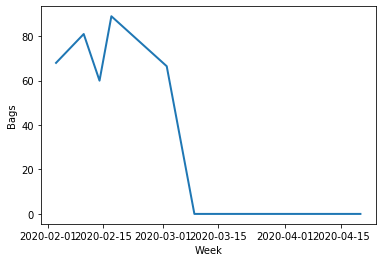

In [308]:
sns.lineplot(weekly['Week'], weekly['Bags'], linewidth=2.0)

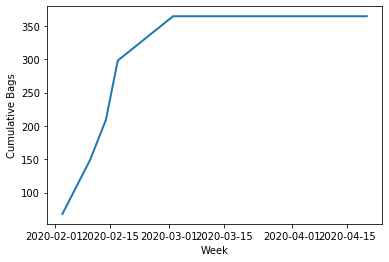

In [309]:
sns.lineplot(weekly['Week'], weekly['Cumulative Bags'], linewidth=2.0)